# :)

In [1]:
import mne
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

In [7]:
# Specify the path to your EDF file
# 1
file_name = 'aaaaajqo_s020_t001.edf'
folder_path = 'C:/Users/Atena/Documents/tuh_eeg_edf_files'
# 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings'
file_path = os.path.join(folder_path, file_name)

# Read the EDF file
raw = mne.io.read_raw_edf(file_path, preload=True)

# Get basic information
print(raw.info)
print(raw.ch_names)

# Extract signal data
data, times = raw[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

Extracting EDF parameters from C:\Users\Atena\Documents\tuh_eeg_edf_files\aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35249  =      0.000 ...   140.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 41
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC',

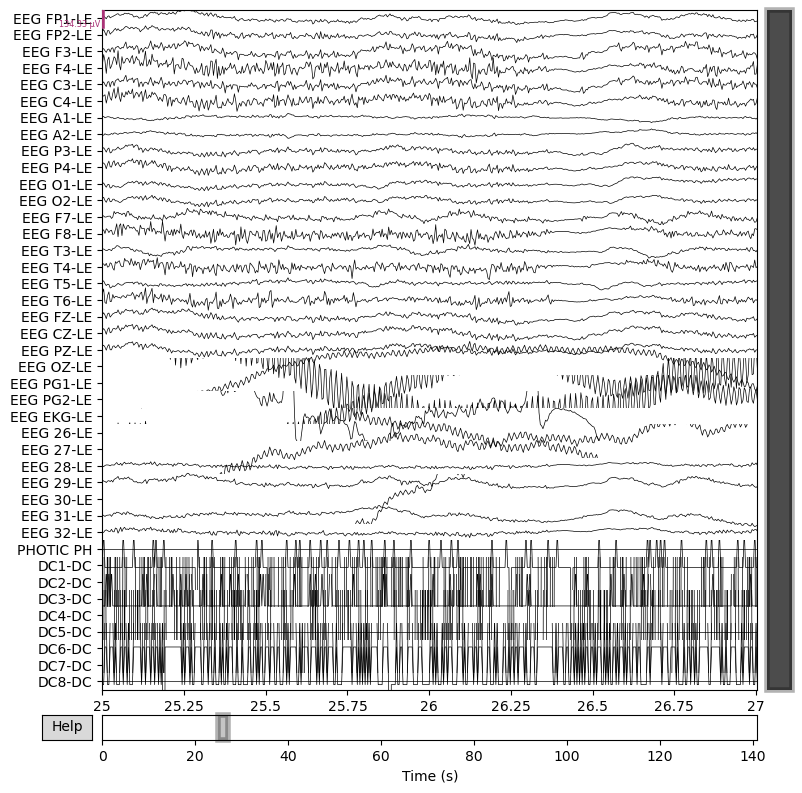

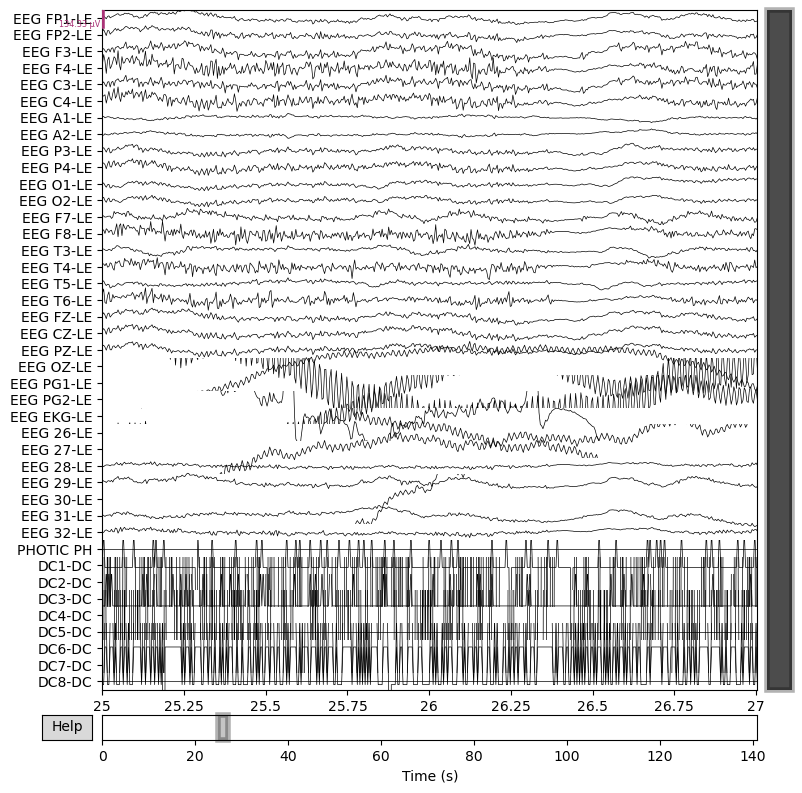

In [8]:
# raw.plot(n_channels=32, duration=times[73000] - times[72000], scalings='auto', title='Raw EEG Data', show=True, block=False)
# raw.plot(n_channels=41, duration=times[6500] - times[6000], scalings='auto', title='Raw EEG Data', show=True, block=False)
raw.plot(
    n_channels=41,
    duration=2,
    start=25,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

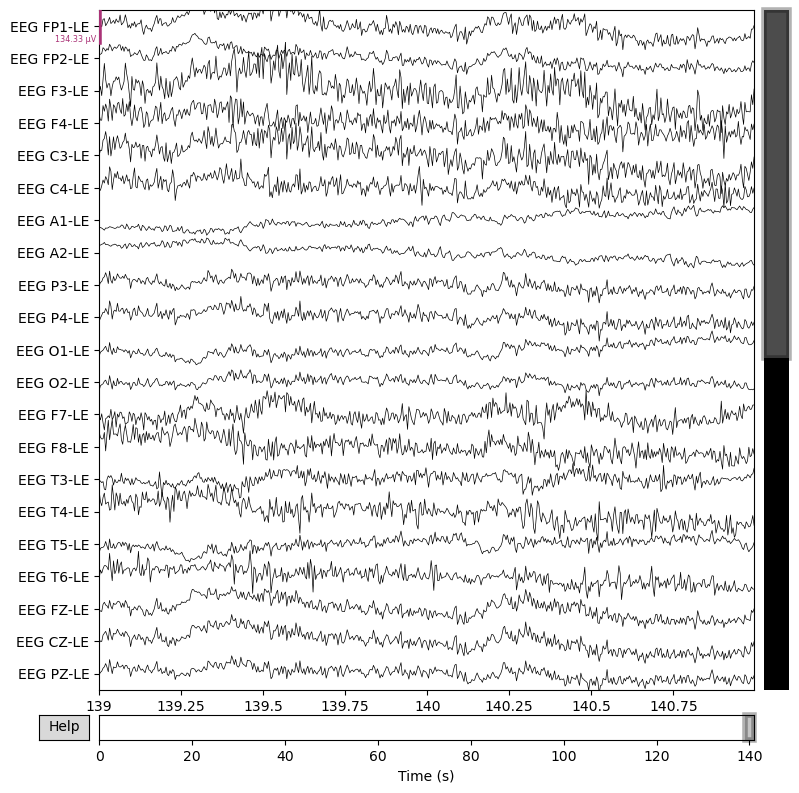

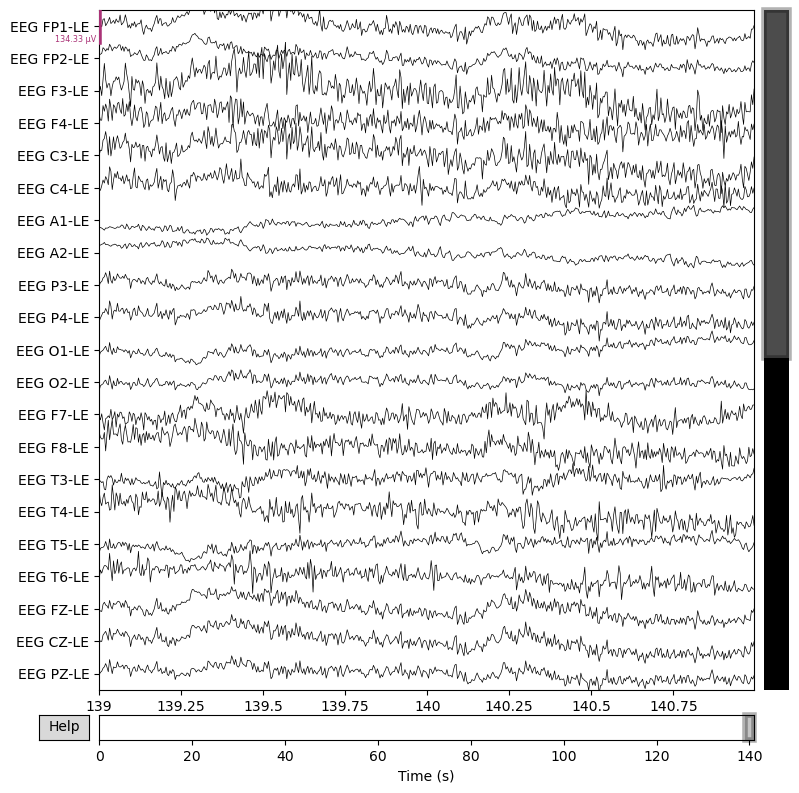

In [9]:
# raw.plot(n_channels=29, duration=times[35240] - times[34740], scalings='auto', title='Raw EEG Data', show=True, block=False)
raw.plot(
    n_channels=21,
    duration=2,
    start=139,
    scalings='auto',
    title='Raw EEG Data',
    show=True,
    block=False
)

In [10]:
preprocEEG = raw

# Band-pass filter the data
preprocEEG.filter(l_freq=1.0, h_freq=50.0)

# Notch filter to remove power line noise (assuming 60 Hz)
preprocEEG.notch_filter(freqs=60.0)

# # # Plot the raw EEG data after filtering
# # # raw.plot(n_channels=len(raw.ch_names), duration=times[-1] - times[0], scalings='auto', title='Filtered EEG Data', show=True, block=True)
# # raw.plot(n_channels=10, duration=times[65400] - times[63400], scalings='auto', title='Raw EEG Data', show=True, block=False)

# # Set up and fit the ICA
# ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
# ica.fit(raw)

# # Find and remove EOG artifacts
# try:
#     eog_inds, eog_scores = ica.find_bads_eog(raw)
#     ica.exclude.extend(eog_inds)
#     print(f"Excluded EOG components: {eog_inds}")
# except RuntimeError as e:
#     print("No EOG artifacts found:", e)

# # Find and remove ECG artifacts
# try:
#     ecg_inds, ecg_scores = ica.find_bads_ecg(raw, method='correlation', threshold='auto')
#     ica.exclude.extend(ecg_inds)
#     print(f"Excluded ECG components: {ecg_inds}")
# except ValueError as e:
#     print("No ECG artifacts found:", e)

# try:
#     emg_inds, scores = ica.find_bads_muscle(raw, threshold=4)
#     ica.exclude.extend(emg_inds)
#     print(f"Excluded EMG components: {emg_inds}")
# except RuntimeError as e:
#     print("No EMG artifacts found:", e)

# # Apply the ICA to the raw data
# raw_ica = raw.copy()
# ica.apply(raw_ica)

# # Re-reference the data to the average reference
# raw_ica.set_eeg_reference('average', projection=True)

# Plot the preprocessed EEG data
# raw_ica.plot(n_channels=len(raw_ica.ch_names), duration=times[-1] - times[0], scalings='auto', title='Preprocessed EEG Data', show=True, block=True)
# raw.plot(n_channels=33, duration=times[17000] - times[15000], scalings='auto', title='Raw EEG Data', show=True, block=False)

# # Save the preprocessed data to a new file (optional)
# preprocessed_file_path = 'C:/Users/Atena/OneDrive - University of Connecticut/DriveCbackup/ThirdPhaseofThesis/Recordings/preprocessed_data.fif'
# raw_ica.save(preprocessed_file_path, overwrite=True)

# preprocEEG = raw_ica

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.0s finished


<RawEDF | aaaaajqo_s020_t001.edf, 41 x 35250 (141.0 s), ~11.1 MB, data loaded>

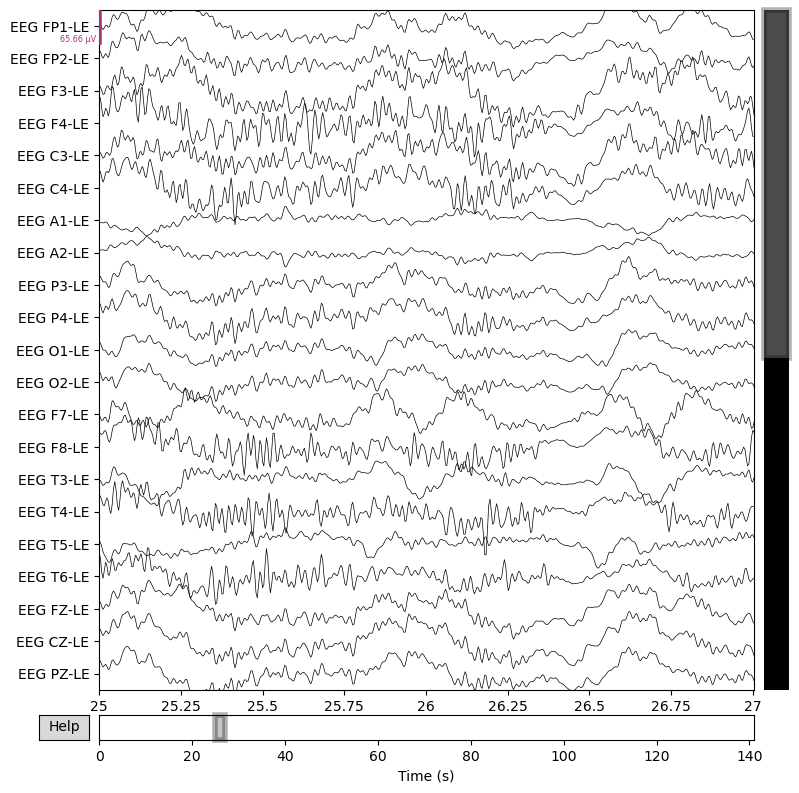

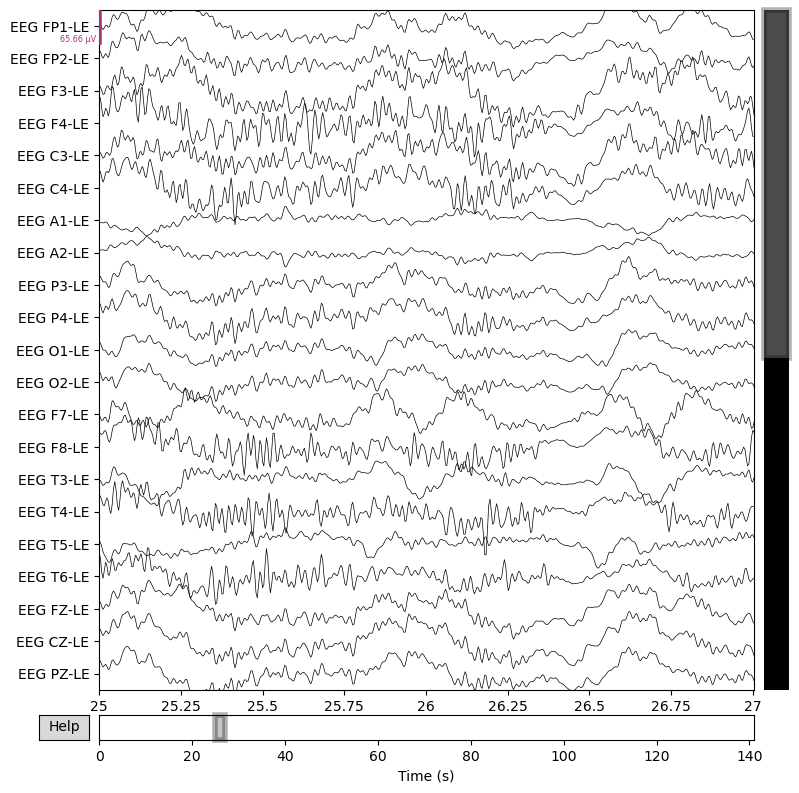

In [13]:
preprocEEG.plot(
    n_channels=21,
    duration=2,
    start=25,
    scalings='auto',
    show=True,
    block=False
)

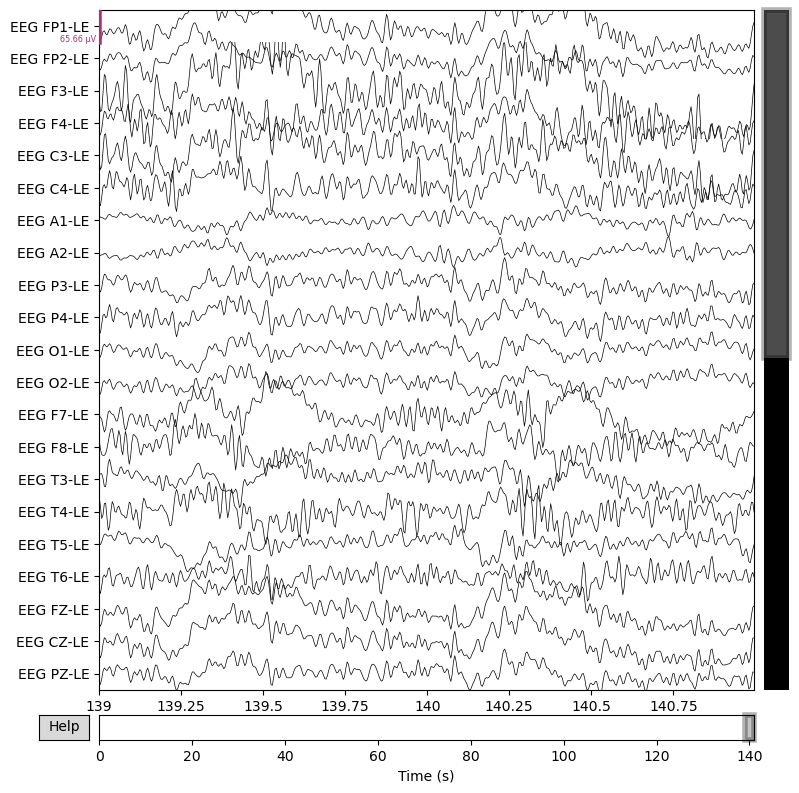

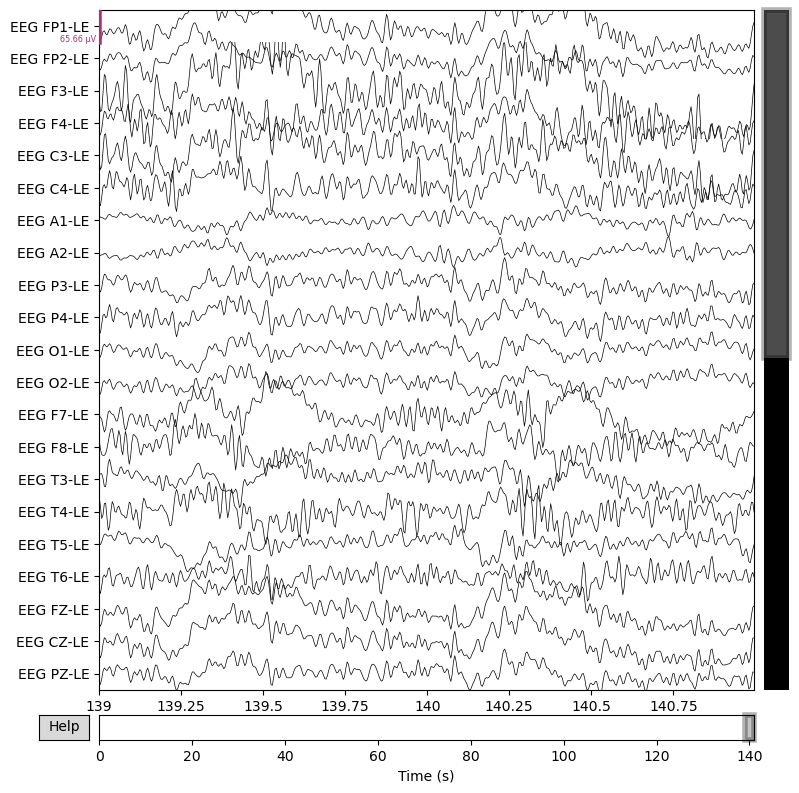

In [15]:
preprocEEG.plot(
    n_channels=21,
    duration=2,
    start=139,
    scalings='auto',
    show=True,
    block=False
)

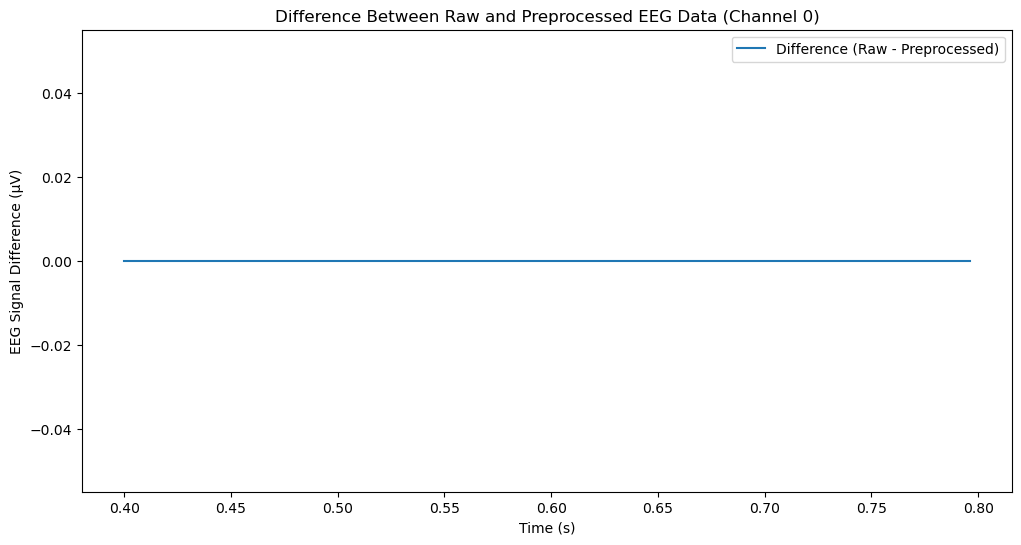

In [16]:
# preprocEEG-raw.plot(
#     n_channels=21,
#     duration=2,
#     start=844,
#     scalings='auto',
#     title='Raw EEG Data',
#     show=True,
#     block=False
# )

# Extract data and times
raw_data, raw_times = raw[:, 100:200]  # raw EEG data and times
preprocessed_data, _ = preprocEEG[:, 100:200]  # preprocessed EEG data

# Compute the difference
data_diff = raw_data - preprocessed_data

# Plot the difference for a specific channel (e.g., channel 0)
channel_idx = 0  # index of the channel you want to plot
plt.figure(figsize=(12, 6))
plt.plot(raw_times, data_diff[channel_idx, :], label='Difference (Raw - Preprocessed)')
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal Difference (µV)')
plt.title(f'Difference Between Raw and Preprocessed EEG Data (Channel {channel_idx})')
plt.legend()
plt.show()

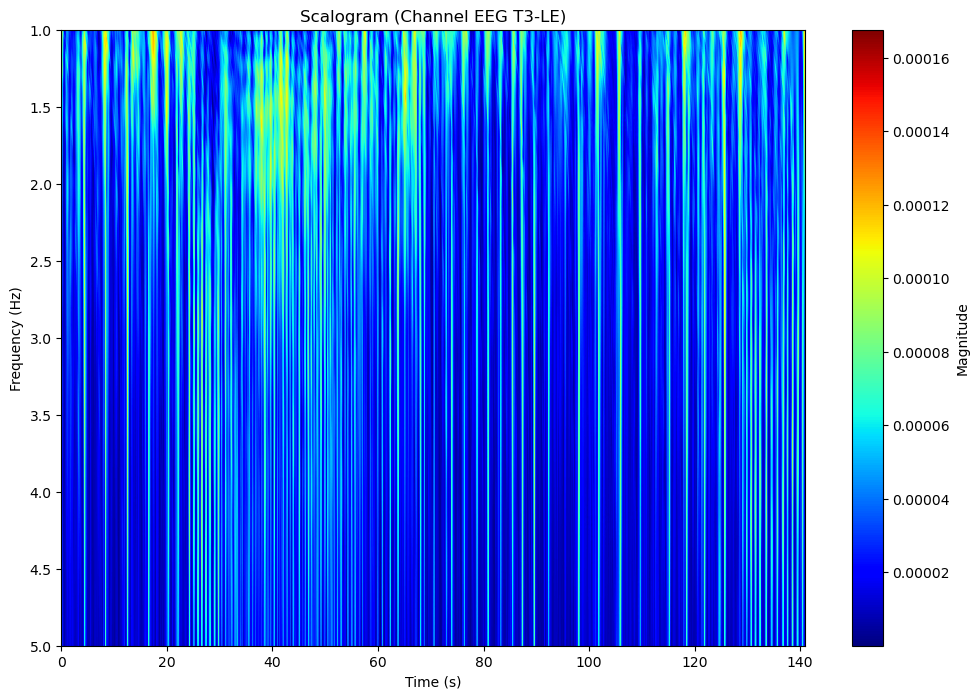

In [18]:
import pywt

# Extract signal data
data, times = preprocEEG[:]
# Select a specific channel to plot its scalogram
channel_index = 14  # Change this index to plot different channels
signal = data[channel_index, :]

# Sampling rate of the data
sampling_rate = raw.info['sfreq']
# nyquist_frequency = sampling_rate / 2
# print(f"Nyquist frequency: {nyquist_frequency} Hz")
# end_frequency = nyquist_frequency
end_frequency = 5

# Define parameters for the wavelet transform
# Choose scales to cover the frequency range up to the Nyquist frequency
frequencies = np.linspace(1, end_frequency, num=256)  # Frequencies from 1 Hz to Nyquist frequency
scales = pywt.scale2frequency('cmor', frequencies) * sampling_rate

# Perform the Continuous Wavelet Transform (CWT)
coefficients, _ = pywt.cwt(signal, scales, 'cmor', 1 / sampling_rate)

# Plot the scalogram
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients), extent=[times[0], times[-1], frequencies[-1], frequencies[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Scalogram (Channel {raw.ch_names[channel_index]})')
plt.show()

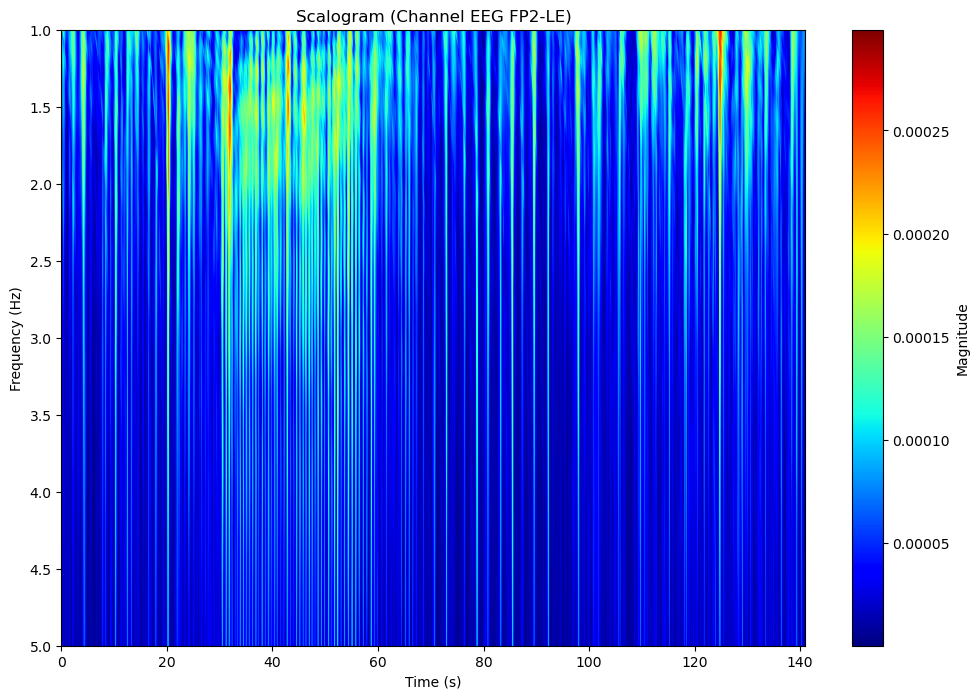

In [19]:
import pywt

# Extract signal data
data, times = preprocEEG[:]
# Select a specific channel to plot its scalogram
channel_index = 1  # Change this index to plot different channels
signal = data[channel_index, :]

# Sampling rate of the data
sampling_rate = raw.info['sfreq']
# nyquist_frequency = sampling_rate / 2
# print(f"Nyquist frequency: {nyquist_frequency} Hz")
# end_frequency = nyquist_frequency
end_frequency = 5

# Define parameters for the wavelet transform
# Choose scales to cover the frequency range up to the Nyquist frequency
frequencies = np.linspace(1, end_frequency, num=256)  # Frequencies from 1 Hz to Nyquist frequency
scales = pywt.scale2frequency('cmor', frequencies) * sampling_rate

# Perform the Continuous Wavelet Transform (CWT)
coefficients, _ = pywt.cwt(signal, scales, 'cmor', 1 / sampling_rate)

# Plot the scalogram
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(coefficients), extent=[times[0], times[-1], frequencies[-1], frequencies[0]], cmap='jet', aspect='auto')
plt.colorbar(label='Magnitude')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title(f'Scalogram (Channel {raw.ch_names[channel_index]})')
plt.show()

In [21]:
# Define the seizure and background time intervals (in seconds)
seizure_start, seizure_end = 24.54, 68.88 
background_start_1, background_end_1 = 0, 24.54
background_start_2, background_end_2 = 68.88, 140

# Sampling frequency
sfreq = raw.info['sfreq']

# Extract seizure and background epochs
seizure_Seg = preprocEEG.copy().crop(tmin=seizure_start, tmax=seizure_end)
background_Seg_1 = preprocEEG.copy().crop(tmin=background_start_1, tmax=background_end_1)
background_Seg_2 = preprocEEG.copy().crop(tmin=background_start_2, tmax=background_end_2)

# If you need to combine the two background segments into one:
background_Seg = mne.concatenate_raws([background_Seg_1, background_Seg_2])

# this code produces up to two artificial epochs

In [22]:
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

def bandpass_filter(data, sfreq, low_freq, high_freq):
    """
    Band-pass filter the data.
    
    Parameters:
    data (ndarray): The input signal of shape (n_channels, n_times)
    sfreq (float): The sampling frequency
    low_freq (float): The lower bound of the frequency range
    high_freq (float): The upper bound of the frequency range
    
    Returns:
    filtered_data (ndarray): The band-pass filtered signal
    """
    nyquist = 0.5 * sfreq
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

def calculate_plv(eeg_data, sfreq, low_freq, high_freq):
    """
    Calculate the Phase Locking Value (PLV) between pairs of EEG channels.
    
    Parameters:
    eeg_data (ndarray): EEG data of shape (n_channels, n_times)
    sfreq (float): Sampling frequency of the EEG data
    low_freq (float): Lower frequency bound for band-pass filter (default 8 Hz)
    high_freq (float): Upper frequency bound for band-pass filter (default 13 Hz)
    
    Returns:
    plv_matrix (ndarray): PLV matrix of shape (n_channels, n_channels)
    """
    n_channels, n_times = eeg_data.shape
    plv_matrix = np.zeros((n_channels, n_channels))
    
    # Band-pass filter the data in the specified frequency band
    eeg_data_filtered = bandpass_filter(eeg_data, sfreq, low_freq, high_freq)
    
    # Compute the analytic signal (Hilbert transform) to get the phase
    analytic_signal = hilbert(eeg_data_filtered, axis=1)
    phase_data = np.angle(analytic_signal)
    
    # Calculate PLV
    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            phase_diff = phase_data[i] - phase_data[j]
            plv = np.abs(np.sum(np.exp(1j * phase_diff)) / n_times)
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv  # PLV is symmetric
    
    return plv_matrix
  

In [23]:
# Helper function to create graph from PLV matrix
def create_graph(plv_matrix, ch_names):
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                G.add_edge(ch1, ch2, weight=weight)
    return G

# Helper function to create graph from PLV matrix
def create_graph_bi(plv_matrix, ch_names):
    # Calculate mean and standard deviation of all values in the matrix
    mean_val = np.mean(plv_matrix)
    std_val = np.std(plv_matrix)
    threshold = mean_val + std_val

    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight >= threshold:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G


In [28]:
data, times = seizure_Seg[:]
plv_matrix = calculate_plv(data[:21, :], sfreq, low_freq= 13 , high_freq= 30)
# print("PLV Matrix:")
# print(plv_matrix)
plv_seizure = plv_matrix

data, times = background_Seg[:]
plv_matrix = calculate_plv(data[:21, :], sfreq, low_freq= 13 , high_freq= 30)
# print("PLV Matrix:")
# print(plv_matrix)
plv_background = plv_matrix

# Create graphs
ch_names = seizure_Seg.ch_names
G_seizure = create_graph(plv_seizure, ch_names[:21])
G_background = create_graph(plv_background, ch_names[:21])
G_seizure_bi = create_graph_bi(plv_seizure, ch_names[:21])
G_background_bi = create_graph_bi(plv_background, ch_names[:21])

In [45]:
print(data[:21, :].shape)
print(ch_names[:21])


# Indices to keep (excluding indices 7 and 8)
indices_to_keep = [i for i in range(21) if i not in [6, 7]]
# Filter the data
filtered_data = data[indices_to_keep, :]
print(filtered_data.shape)

# Filter the channel names
filtered_ch_names = [ch_names[i] for i in indices_to_keep]
print(filtered_ch_names)

(21, 23917)
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']
(19, 23917)
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']


In [48]:
# Parameters
epoch_length = 2  # in seconds
epoch_samples = int(epoch_length * sfreq)

def epoch_data(data, sfreq, epoch_length):
    n_channels, n_samples = data.shape
    epoch_samples = int(epoch_length * sfreq)
    n_epochs = n_samples // epoch_samples
    epochs = np.array_split(data[:, :n_epochs * epoch_samples], n_epochs, axis=1)
    return epochs

# Epoch the seizure_Seg and background_Seg
seizure_epochs = epoch_data(seizure_Seg[:][0][indices_to_keep], sfreq, epoch_length)
background_epochs = epoch_data(background_Seg[:][0][indices_to_keep], sfreq, epoch_length)

# Function to process epochs and calculate mean PLV
def process_epochs(epochs, sfreq, low_freq, high_freq):
    plv_all = []
    for epoch in epochs:
        plv_matrix = calculate_plv(epoch, sfreq, low_freq=low_freq, high_freq=high_freq)
        plv_all.append(plv_matrix)
    # plv_mean = np.mean(plv_all, axis=0)  # Averaging the PLV matrices
    # return plv_mean, plv_all
    return plv_all

# Calculate PLV for each epoch and the mean PLV for seizure and background data
# plv_seizure_mean, plv_seizure_all = process_epochs(seizure_epochs, sfreq, low_freq=8, high_freq=13)
# plv_background_mean, plv_background_all = process_epochs(background_epochs, sfreq, low_freq=8, high_freq=13)
plv_seizure_all = process_epochs(seizure_epochs, sfreq, low_freq=13, high_freq=30)
plv_background_all = process_epochs(background_epochs, sfreq, low_freq=13, high_freq=30)

In [49]:
# Create graphs and extract features for each epoch
def create_graphs(plv_all, ch_names):
    graphs = [create_graph(plv, ch_names) for plv in plv_all]
    graphs_bi = [create_graph_bi(plv, ch_names) for plv in plv_all]
    return graphs, graphs_bi

In [50]:
# Process seizure and background epochs
G_seizure, G_seizure_bi = create_graphs(plv_seizure_all, filtered_ch_names)
G_background, G_background_bi = create_graphs(plv_background_all, filtered_ch_names)

In [51]:
print(len(plv_seizure_all))
print(plv_seizure_all[0].shape)
print(len(plv_background_all))
print(plv_background_all[0].shape)

22
(19, 19)
47
(19, 19)


In [52]:
# Convert the list of arrays to a single 3D array
plv_seizure_all_values = np.array(plv_seizure_all)

# Calculate the mean of all values
mean_value_seizure = np.mean(plv_seizure_all_values)

# Calculate the standard deviation of all values
std_value_seizure = np.std(plv_seizure_all_values)

print(f"Mean: {mean_value_seizure}")
print(f"Standard Deviation: {std_value_seizure}")

Mean: 0.44120329721373636
Standard Deviation: 0.2564462438764247


In [53]:
# Convert the list of arrays to a single 3D array
plv_background_all_values = np.array(plv_background_all)

# Calculate the mean of all values
mean_value_background = np.mean(plv_background_all_values)

# Calculate the standard deviation of all values
std_value_background = np.std(plv_background_all_values)

print(f"Mean: {mean_value_background}")
print(f"Standard Deviation: {std_value_background}")

Mean: 0.45544410907292165
Standard Deviation: 0.26690768472582055


In [54]:
# Helper function to create graph from PLV matrix
def create_graph_bi_main(plv_matrix, ch_names, threshold):
    
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight >= threshold:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G

In [56]:
# Calculate mean and standard deviation of all values in the matrix
threshold = mean_value_background + std_value_background
G_seizure_bi = [create_graph_bi_main(plv, filtered_ch_names, threshold) for plv in plv_seizure_all]
G_background_bi = [create_graph_bi_main(plv, filtered_ch_names, threshold) for plv in plv_background_all]

In [57]:
G_seizure_bi 

In [38]:
# # Original pos dictionary
# pos = {'FP1': (-0.3, 0.8),
#  'FP2': (0.3, 0.8),
#  'F3': (-0.4, 0.4),
#  'F4': (0.4, 0.4),
#  'C3': (-0.5, 0.0),
#  'C4': (0.5, 0.0),
#  'P3': (-0.4, -0.4),
#  'P4': (0.4, -0.4),
#  'O1': (-0.3, -0.8),
#  'O2': (0.3, -0.8),
#  'F7': (-0.7, 0.5),
#  'F8': (0.7, 0.5),
#  'T3': (-0.8, 0),
#  'T4': (0.8, 0),
#  'T5': (-0.6, -0.5),
#  'T6': (0.6, -0.5),
#  'T1': (-0.6, 0.5),
#  'T2': (0.6, 0.5),
#  'FZ': (0.0, 0.3),
#  'CZ': (0.0, 0.0),
#  'PZ': (0.0, -0.3)}

# # Order list
# order = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']

# # Simplified order list
# simplified_order = [item.replace('EEG ', '').replace('-LE', '') for item in order]

# # Sorted and updated pos dictionary
# sorted_pos = {key: pos.get(key, None) for key in simplified_order}

# print(sorted_pos)


{'FP1': (-0.3, 0.8), 'FP2': (0.3, 0.8), 'F3': (-0.4, 0.4), 'F4': (0.4, 0.4), 'C3': (-0.5, 0.0), 'C4': (0.5, 0.0), 'A1': None, 'A2': None, 'P3': (-0.4, -0.4), 'P4': (0.4, -0.4), 'O1': (-0.3, -0.8), 'O2': (0.3, -0.8), 'F7': (-0.7, 0.5), 'F8': (0.7, 0.5), 'T3': (-0.8, 0), 'T4': (0.8, 0), 'T5': (-0.6, -0.5), 'T6': (0.6, -0.5), 'FZ': (0.0, 0.3), 'CZ': (0.0, 0.0), 'PZ': (0.0, -0.3)}


In [39]:
# print(simplified_order)

['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'A1', 'A2', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']


In [61]:
print(len(G_seizure_bi))
print(len(G_background_bi))

22
47


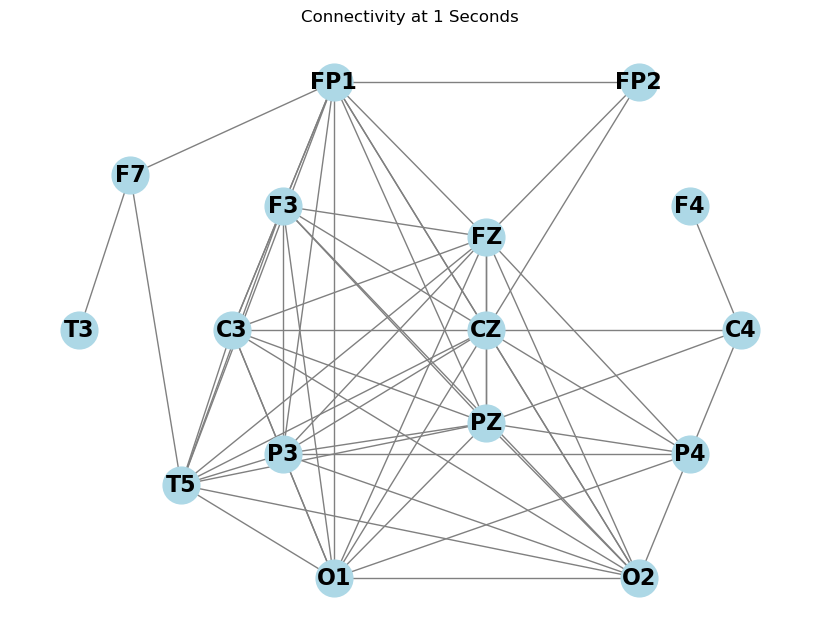

In [62]:
electrode_names = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']
simplified_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']

# Create the mapping dictionary
label_mapping = dict(zip(electrode_names, simplified_names))

# Function to relabel nodes
def relabel_nodes(G, mapping):
    return nx.relabel_nodes(G, mapping, copy=True)

# Plot only the first and third graphs
for i in range(0, 12, 60):  # Indexes for the first and third graphs
    G = G_background_bi[i]
    # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, sorted_pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*i+1} Seconds')
    plt.show()

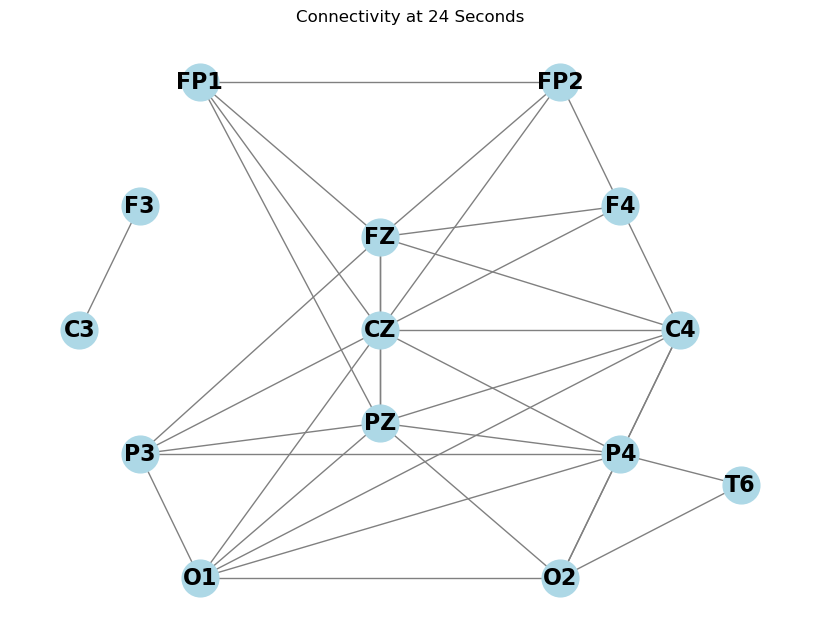

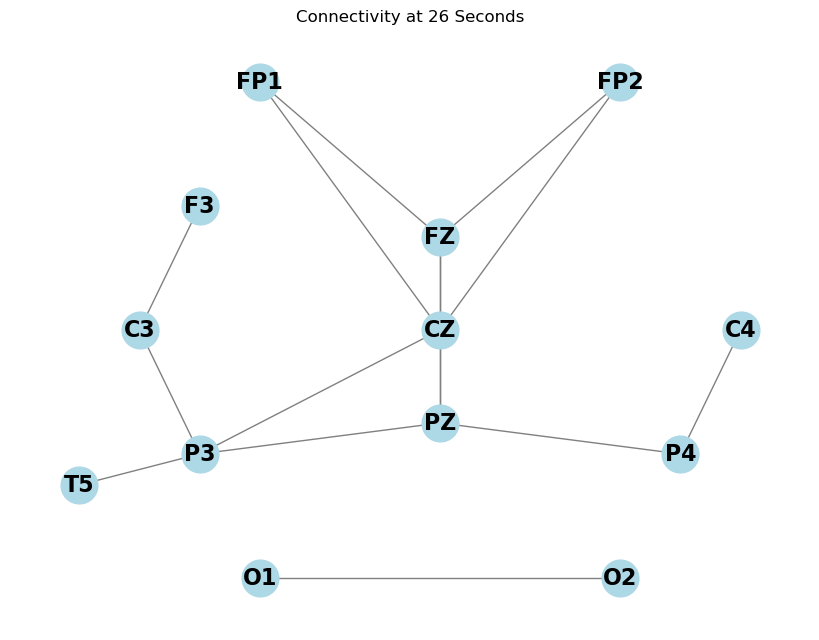

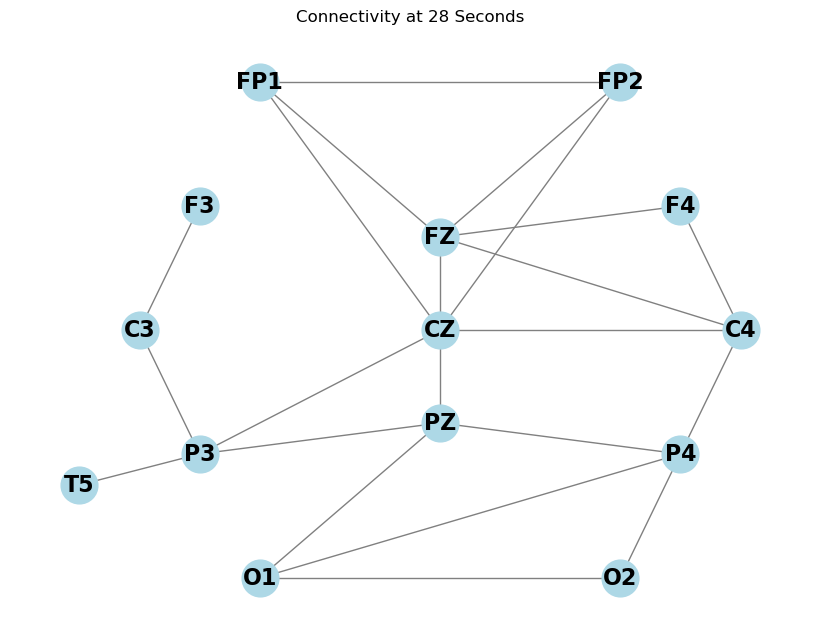

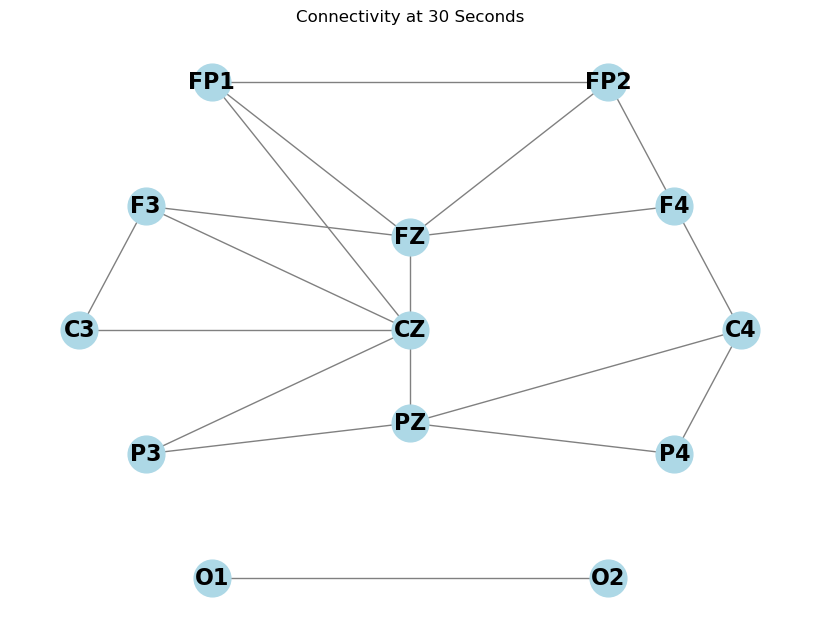

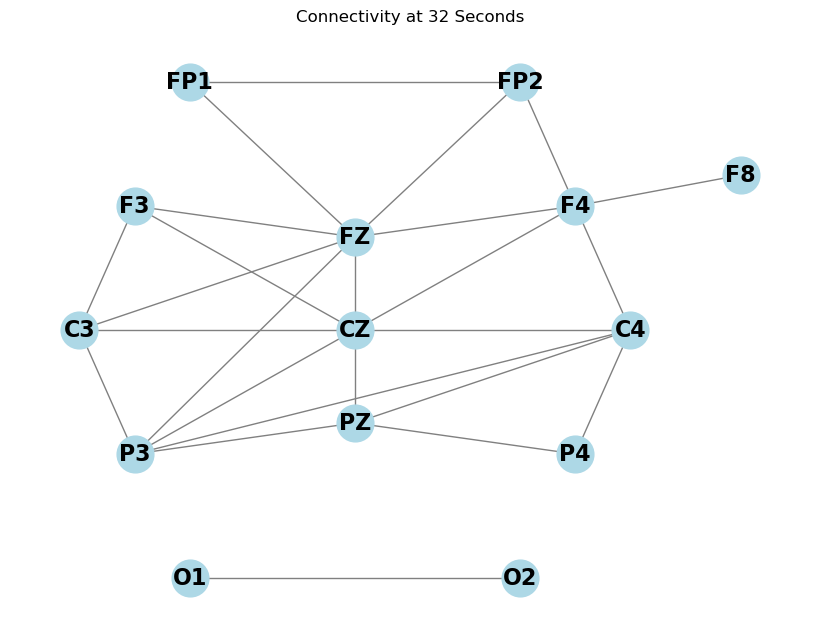

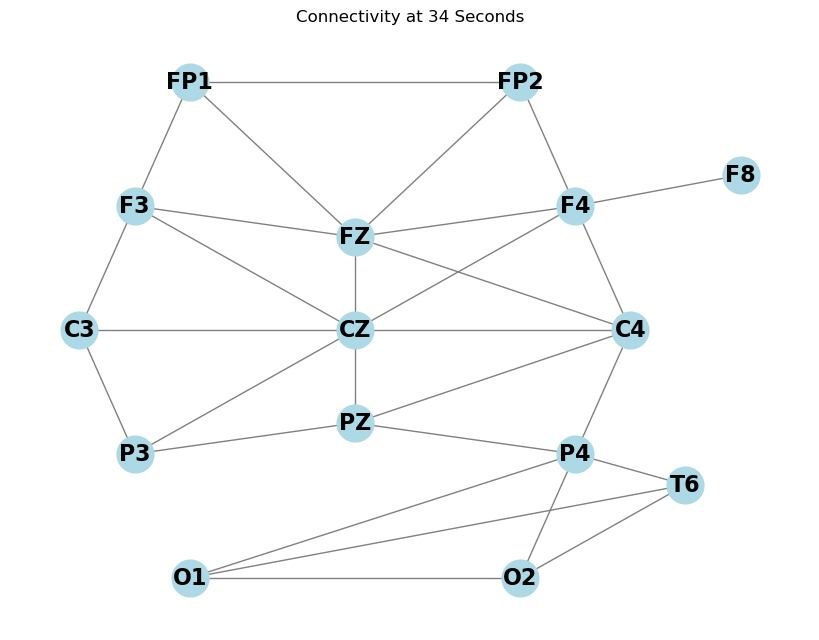

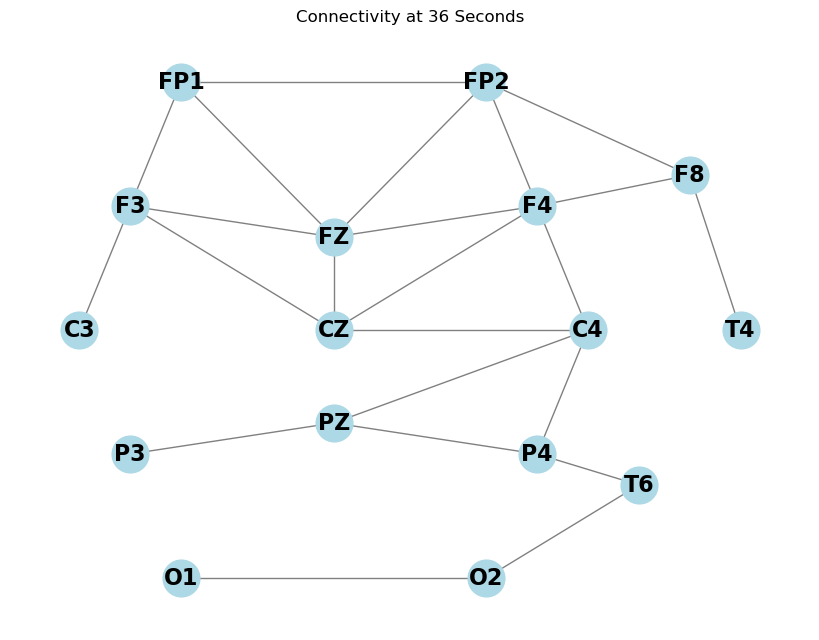

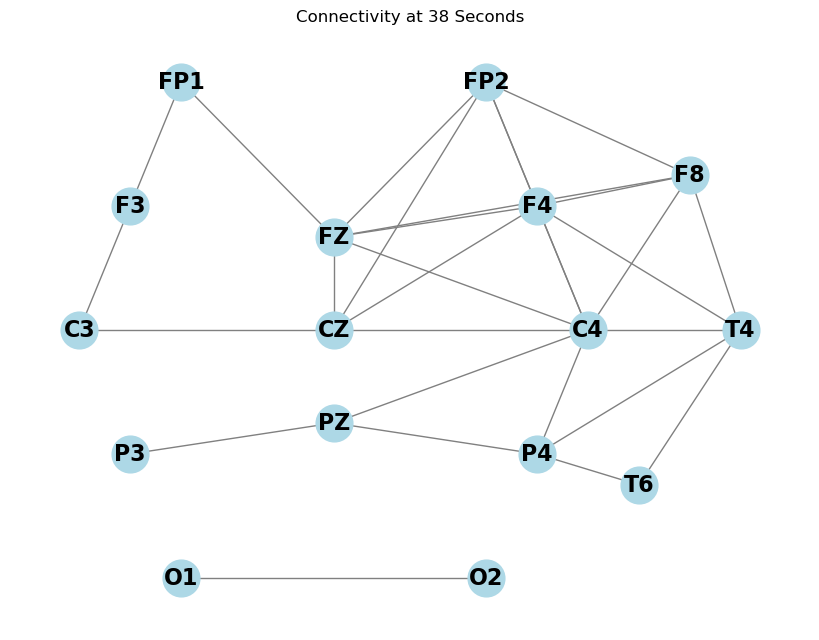

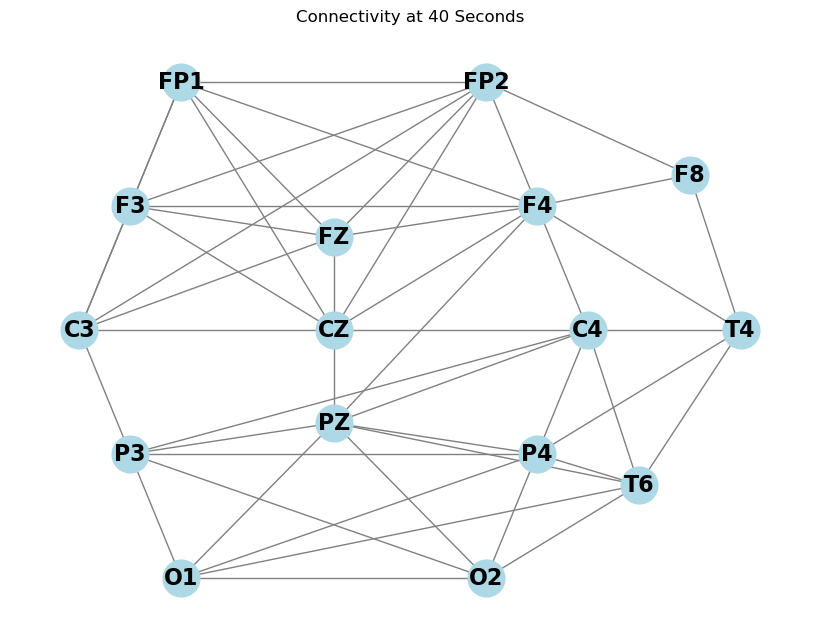

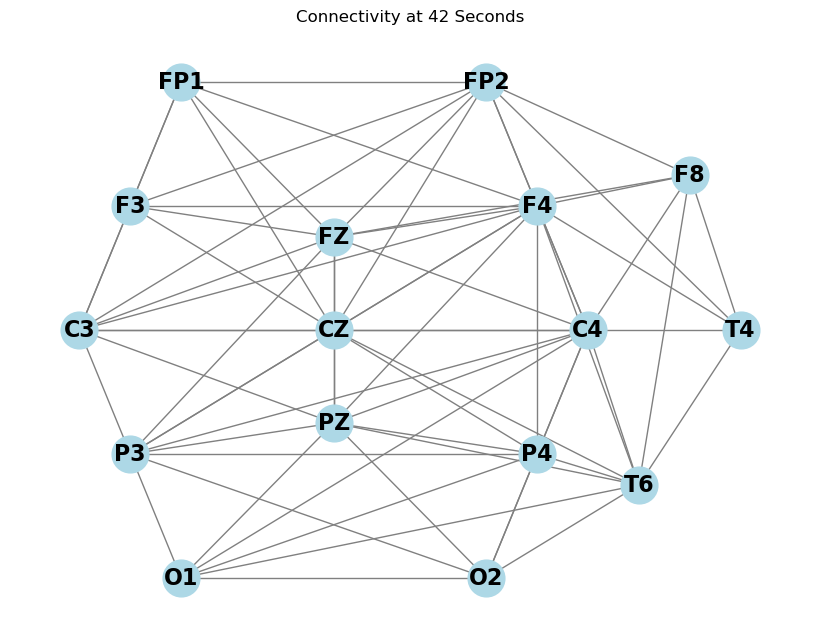

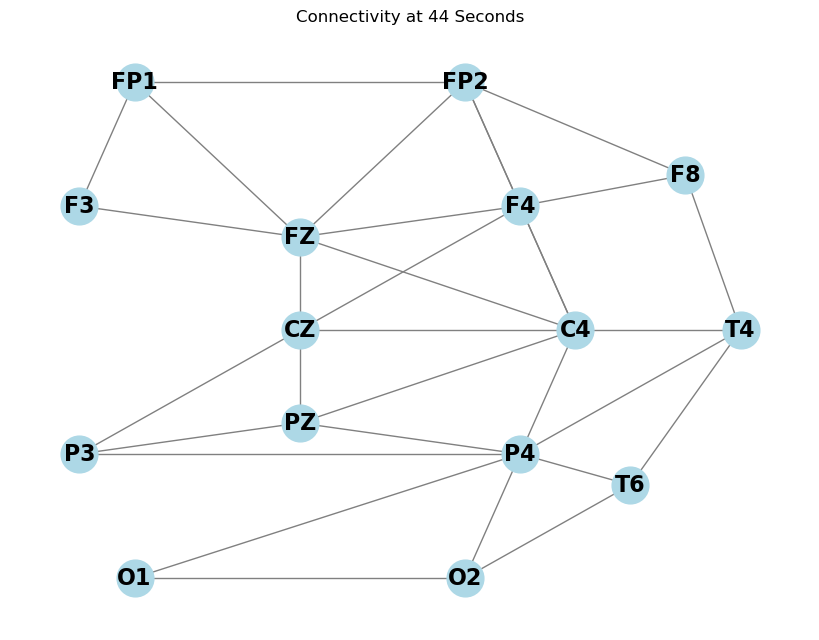

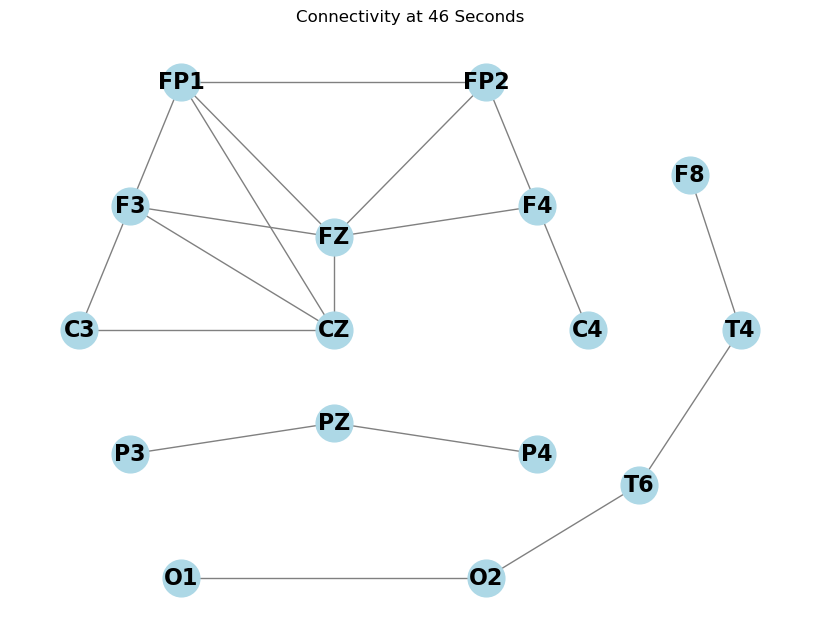

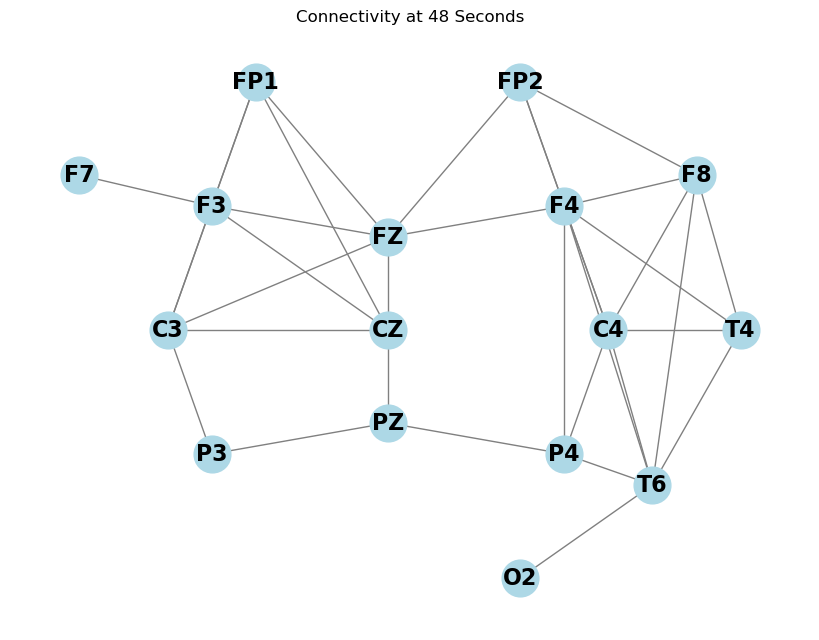

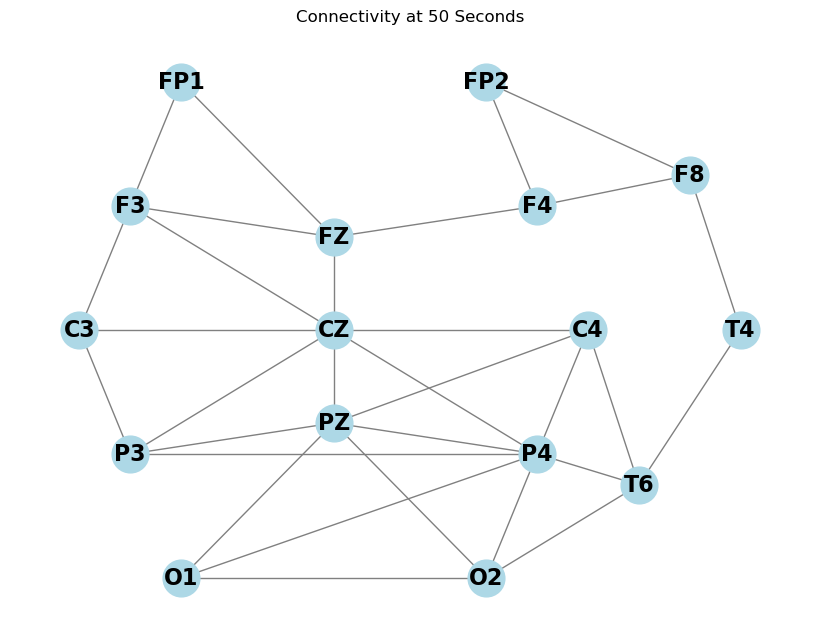

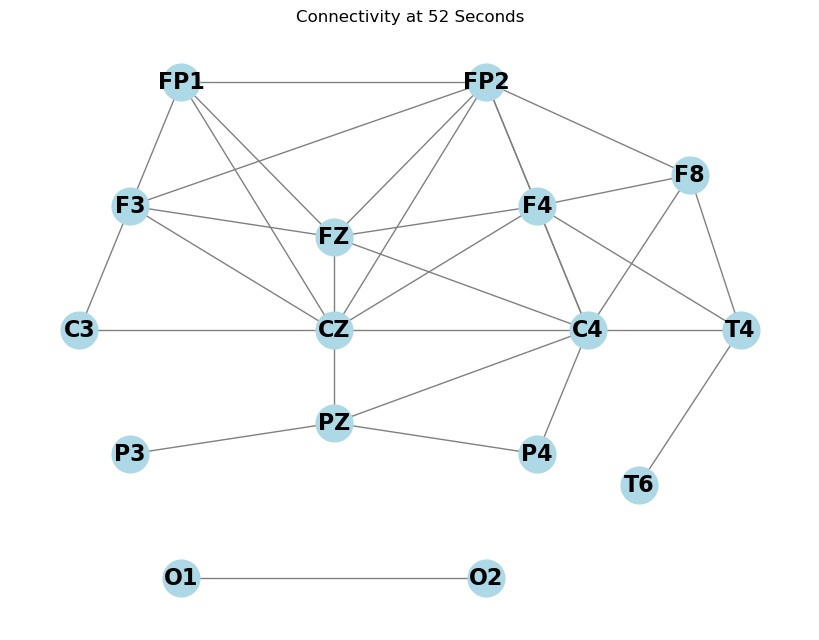

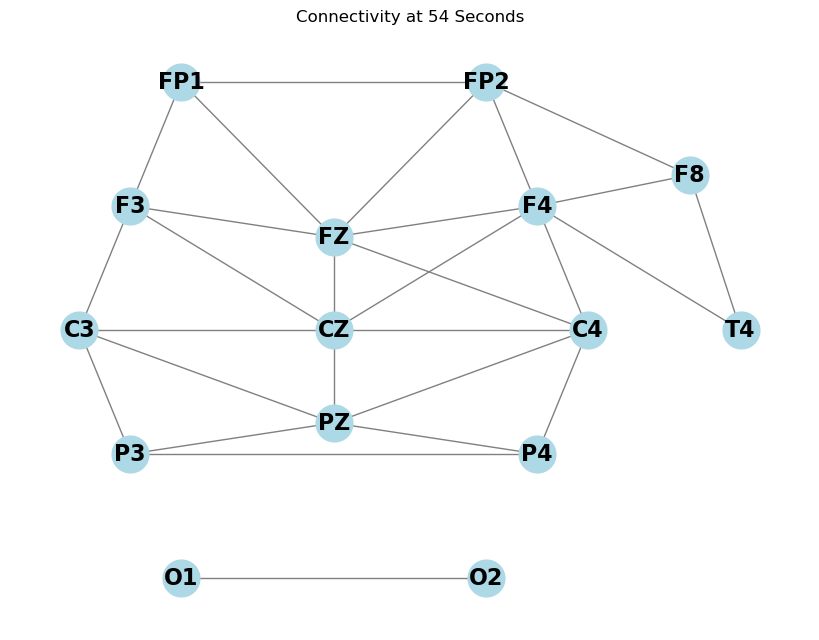

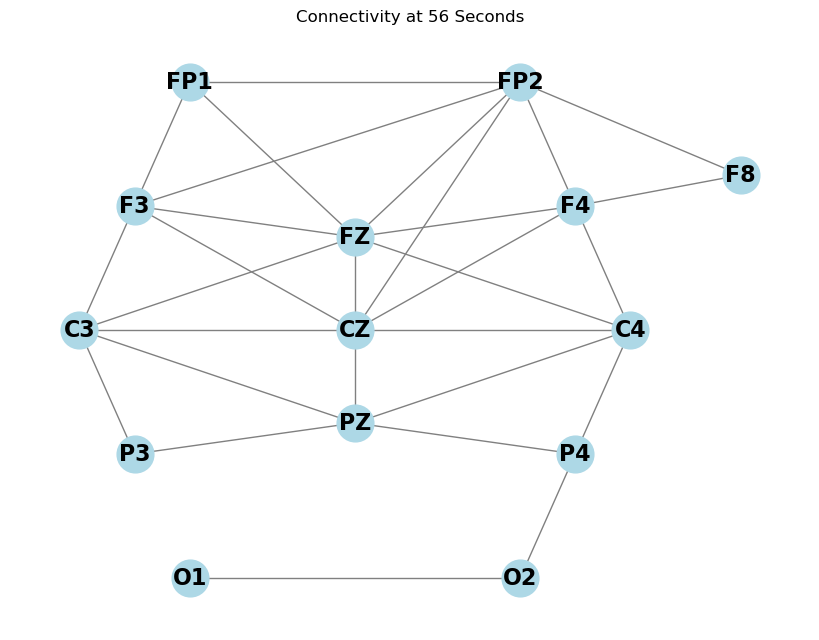

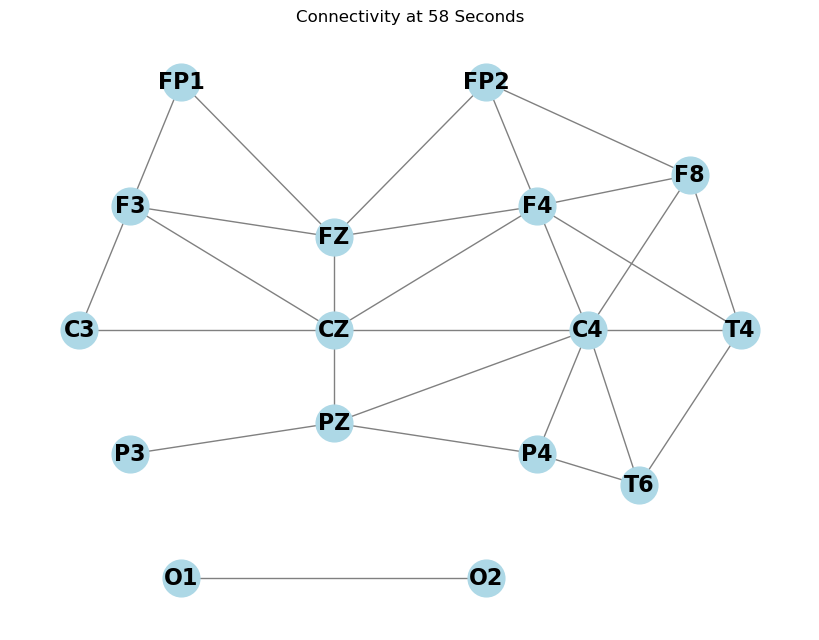

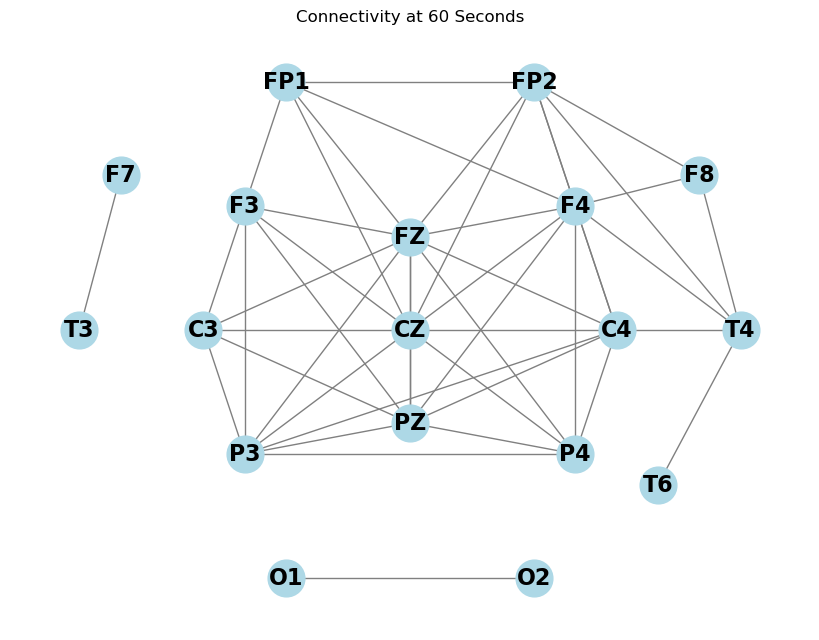

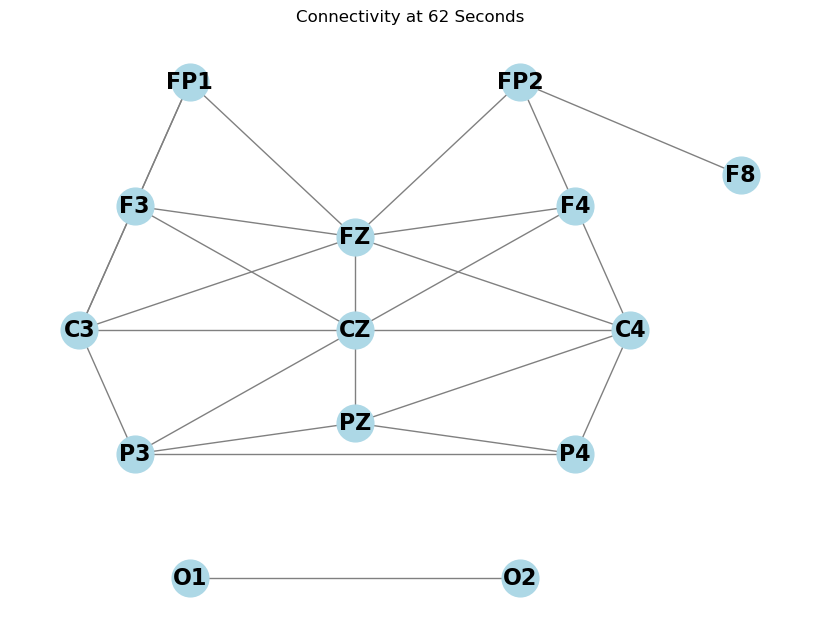

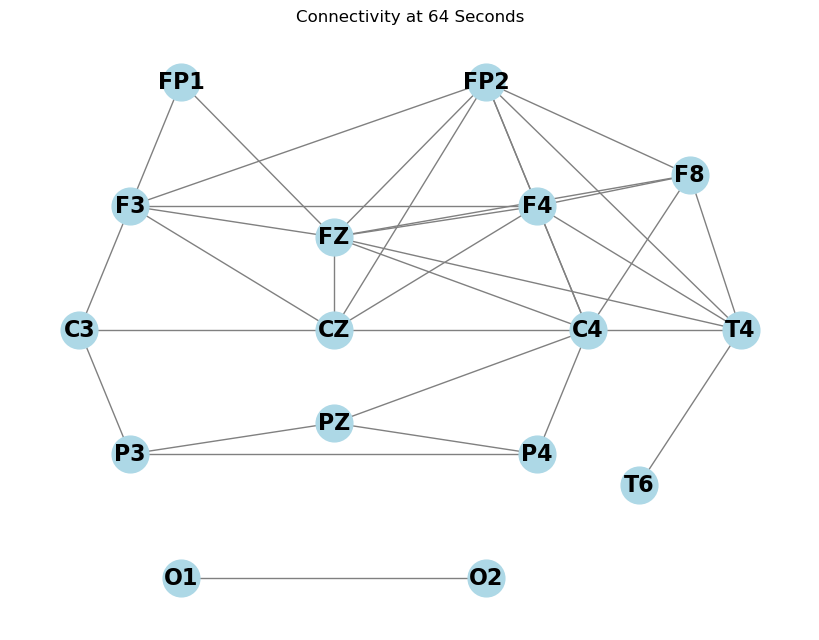

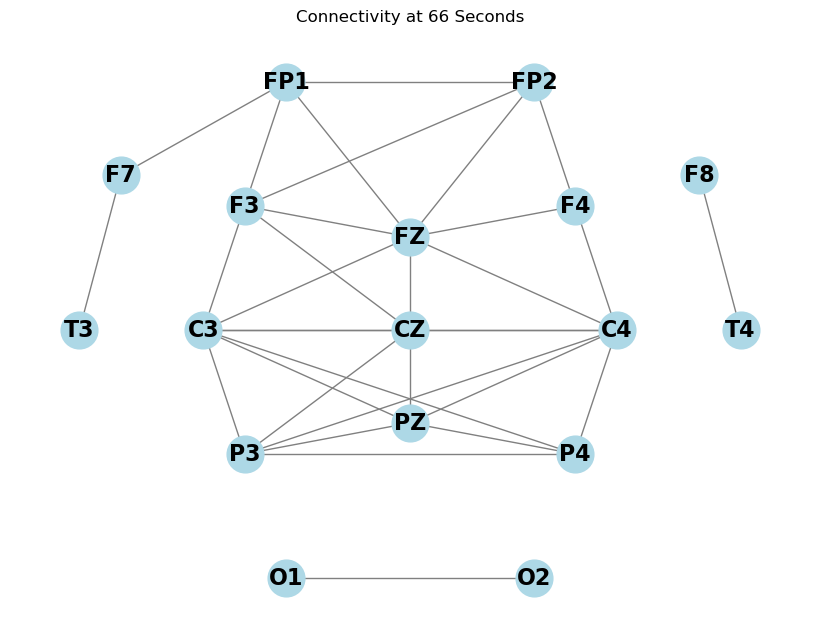

In [67]:
# Plot only the first and third graphs
for i in range(0, 22, 1):  # Indexes for the first and third graphs
    G = G_seizure_bi[i]
        # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*i+24} Seconds')
    plt.show()

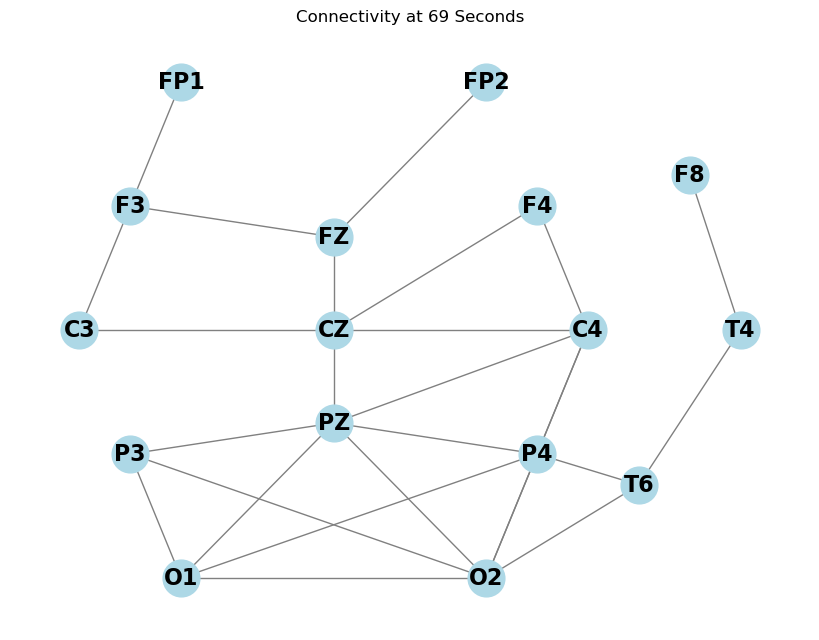

In [66]:
# for G in G_background_bi:
# Plot only the first and third graphs
for i in range(13, 47, 60):  # Indexes for the first and third graphs
    G = G_background_bi[i]
    # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {2*(i-13)+69} Seconds')
    plt.show()


In [68]:
def feature_extract_bi(graph):
    features = {}
    
    features['density'] = nx.density(graph)
    # features['clustering_coefficient'] = nx.average_clustering(graph)
        # Calculate clustering coefficient with error handling

    try:
        if len(graph) > 0 and len([n for n in graph.nodes() if nx.clustering(graph, n) > 0]) > 0:
            features['clustering_coefficient'] = nx.average_clustering(graph)
        else:
            features['clustering_coefficient'] = 0
    except ZeroDivisionError:
        features['clustering_coefficient'] = 0

    features['number_of_connected_components'] = nx.number_connected_components(graph)
        
    return features

In [69]:
features_seizure_bi = [feature_extract_bi(G) for G in G_seizure_bi]
print(features_seizure_bi)

[{'density': 0.38461538461538464, 'clustering_coefficient': 0.6246031746031745, 'number_of_connected_components': 2}, {'density': 0.19230769230769232, 'clustering_coefficient': 0.26153846153846155, 'number_of_connected_components': 2}, {'density': 0.24175824175824176, 'clustering_coefficient': 0.4761904761904762, 'number_of_connected_components': 1}, {'density': 0.24358974358974358, 'clustering_coefficient': 0.5128205128205128, 'number_of_connected_components': 2}, {'density': 0.27472527472527475, 'clustering_coefficient': 0.5302721088435374, 'number_of_connected_components': 2}, {'density': 0.2761904761904762, 'clustering_coefficient': 0.5876190476190476, 'number_of_connected_components': 1}, {'density': 0.19166666666666668, 'clustering_coefficient': 0.26458333333333334, 'number_of_connected_components': 1}, {'density': 0.24166666666666667, 'clustering_coefficient': 0.40193452380952377, 'number_of_connected_components': 2}, {'density': 0.4166666666666667, 'clustering_coefficient': 0.6

In [70]:
features_background_bi = [feature_extract_bi(G) for G in G_background_bi]
print(features_background_bi)

[{'density': 0.5083333333333333, 'clustering_coefficient': 0.6970598845598845, 'number_of_connected_components': 1}, {'density': 0.34065934065934067, 'clustering_coefficient': 0.577891156462585, 'number_of_connected_components': 2}, {'density': 0.4065934065934066, 'clustering_coefficient': 0.6307256235827664, 'number_of_connected_components': 1}, {'density': 0.4666666666666667, 'clustering_coefficient': 0.7398172198172198, 'number_of_connected_components': 2}, {'density': 0.3076923076923077, 'clustering_coefficient': 0.5198979591836734, 'number_of_connected_components': 2}, {'density': 0.3956043956043956, 'clustering_coefficient': 0.6615079365079364, 'number_of_connected_components': 1}, {'density': 0.4857142857142857, 'clustering_coefficient': 0.682953342953343, 'number_of_connected_components': 1}, {'density': 0.5833333333333334, 'clustering_coefficient': 0.7463841713841716, 'number_of_connected_components': 1}, {'density': 0.2857142857142857, 'clustering_coefficient': 0.488888888888

In [71]:
# Initialize lists to collect each feature
density_seizure_list = []
clustering_coefficient_seizure_list = []
number_of_connected_components_seizure_list = []

# Collect each feature into lists
for features in features_seizure_bi:
    density_seizure_list.append(features['density'])
    clustering_coefficient_seizure_list.append(features['clustering_coefficient'])
    number_of_connected_components_seizure_list.append(features['number_of_connected_components'])

# Convert lists to numpy arrays for easier computation
density_seizure_array = np.array(density_seizure_list)
clustering_coefficient_seizure_array = np.array(clustering_coefficient_seizure_list)
number_of_connected_components_seizure_array = np.array(number_of_connected_components_seizure_list)

# Calculate mean and standard deviation for each feature
mean_density_seizure = np.mean(density_seizure_array)
std_density_seizure = np.std(density_seizure_array)

mean_clustering_coefficient_seizure = np.mean(clustering_coefficient_seizure_array)
std_clustering_coefficient_seizure = np.std(clustering_coefficient_seizure_array)

mean_number_of_connected_components_seizure = np.mean(number_of_connected_components_seizure_array)
std_number_of_connected_components_seizure = np.std(number_of_connected_components_seizure_array)

# Print results
print(f"Density Seizure: Mean = {mean_density_seizure}, Standard Deviation = {std_density_seizure}")
print(f"Clustering Coefficient Seizure: Mean = {mean_clustering_coefficient_seizure}, Standard Deviation = {std_clustering_coefficient_seizure}")
print(f"Number of Connected Components Seizure: Mean = {mean_number_of_connected_components_seizure}, Standard Deviation = {std_number_of_connected_components_seizure}")


Density Seizure: Mean = 0.283195644225056, Standard Deviation = 0.08361700190359721
Clustering Coefficient Seizure: Mean = 0.5035488711183421, Standard Deviation = 0.12169576491941397
Number of Connected Components Seizure: Mean = 1.7272727272727273, Standard Deviation = 0.6863485850246136


In [72]:
# Initialize lists to collect each feature
density_background_list = []
clustering_coefficient_background_list = []
number_of_connected_components_background_list = []

# Collect each feature into lists
for features in features_background_bi:
    density_background_list.append(features['density'])
    clustering_coefficient_background_list.append(features['clustering_coefficient'])
    number_of_connected_components_background_list.append(features['number_of_connected_components'])

# Convert lists to numpy arrays for easier computation
density_background_array = np.array(density_background_list)
clustering_coefficient_background_array = np.array(clustering_coefficient_background_list)
number_of_connected_components_background_array = np.array(number_of_connected_components_background_list)

# Calculate mean and standard deviation for each feature
mean_density_background = np.mean(density_background_array)
std_density_background = np.std(density_background_array)

mean_clustering_coefficient_background = np.mean(clustering_coefficient_background_array)
std_clustering_coefficient_background = np.std(clustering_coefficient_background_array)

mean_number_of_connected_components_background = np.mean(number_of_connected_components_background_array)
std_number_of_connected_components_background = np.std(number_of_connected_components_background_array)

# Print results
print(f"Density Background: Mean = {mean_density_background}, Standard Deviation = {std_density_background}")
print(f"Clustering Coefficient Background: Mean = {mean_clustering_coefficient_background}, Standard Deviation = {std_clustering_coefficient_background}")
print(f"Number of Connected Components Background: Mean = {mean_number_of_connected_components_background}, Standard Deviation = {std_number_of_connected_components_background}")

Density Background: Mean = 0.3835940377242003, Standard Deviation = 0.15392012616007733
Clustering Coefficient Background: Mean = 0.570140760047675, Standard Deviation = 0.1947130276240719
Number of Connected Components Background: Mean = 1.3404255319148937, Standard Deviation = 0.7227782021899161


In [73]:
# Concatenate the segments
density_combined = np.concatenate((density_background_array[:12], density_seizure_array, density_background_array[13:]))
clustering_coefficient_combined = np.concatenate((clustering_coefficient_background_array[:12], clustering_coefficient_seizure_array, clustering_coefficient_background_array[13:]))
number_of_connected_components_combined = np.concatenate((number_of_connected_components_background_array[:12], number_of_connected_components_seizure_array, number_of_connected_components_background_array[13:]))

In [74]:
# Initialize lists to collect each feature
density_background_list = []
clustering_coefficient_background_list = []
number_of_connected_components_background_list = []

# Collect each feature into lists
for features in features_background_bi:
    density_background_list.append(features['density'])
    clustering_coefficient_background_list.append(features['clustering_coefficient'])
    number_of_connected_components_background_list.append(features['number_of_connected_components'])

# Convert lists to numpy arrays for easier computation
density_background_array = np.array(density_background_list)
clustering_coefficient_background_array = np.array(clustering_coefficient_background_list)
number_of_connected_components_background_array = np.array(number_of_connected_components_background_list)

# Calculate mean and standard deviation for each feature
mean_density_background = np.mean(density_background_array)
std_density_background = np.std(density_background_array)

mean_clustering_coefficient_background = np.mean(clustering_coefficient_background_array)
std_clustering_coefficient_background = np.std(clustering_coefficient_background_array)

mean_number_of_connected_components_background = np.mean(number_of_connected_components_background_array)
std_number_of_connected_components_background = np.std(number_of_connected_components_background_array)

# Print results
print(f"Density Background: Mean = {mean_density_background}, Standard Deviation = {std_density_background}")
print(f"Clustering Coefficient Background: Mean = {mean_clustering_coefficient_background}, Standard Deviation = {std_clustering_coefficient_background}")
print(f"Number of Connected Components Background: Mean = {mean_number_of_connected_components_background}, Standard Deviation = {std_number_of_connected_components_background}")

Density Background: Mean = 0.3835940377242003, Standard Deviation = 0.15392012616007733
Clustering Coefficient Background: Mean = 0.570140760047675, Standard Deviation = 0.1947130276240719
Number of Connected Components Background: Mean = 1.3404255319148937, Standard Deviation = 0.7227782021899161


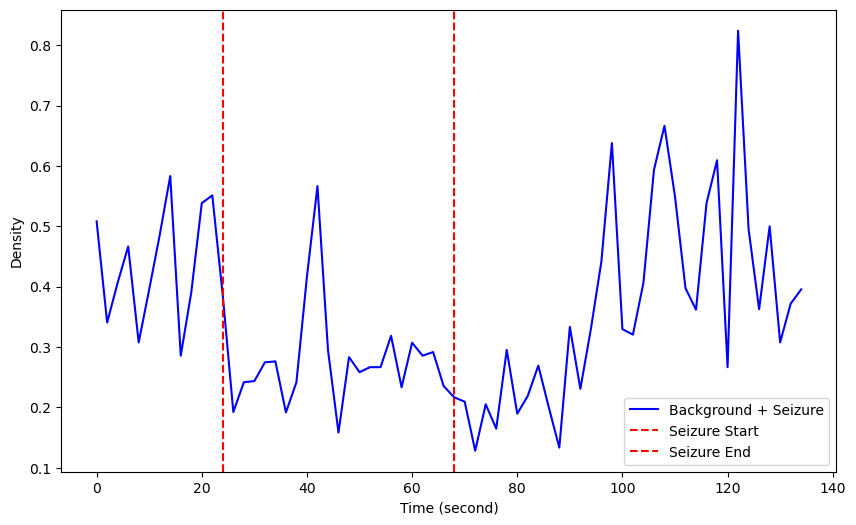

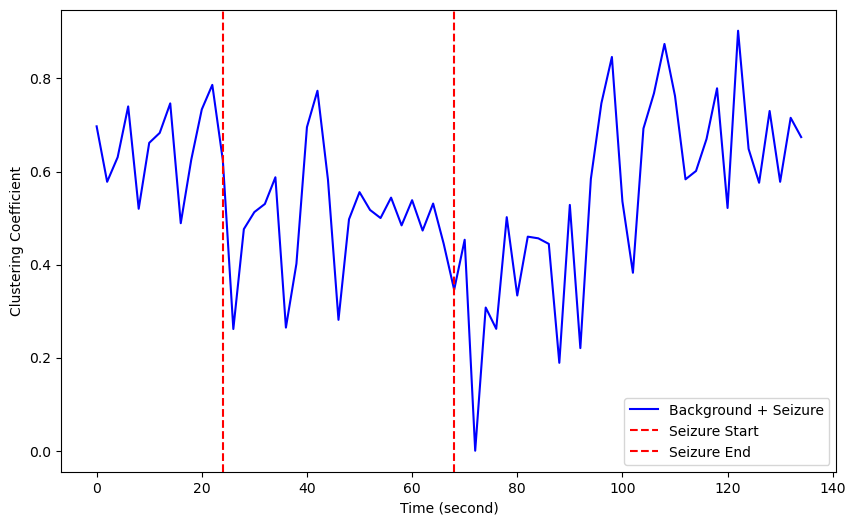

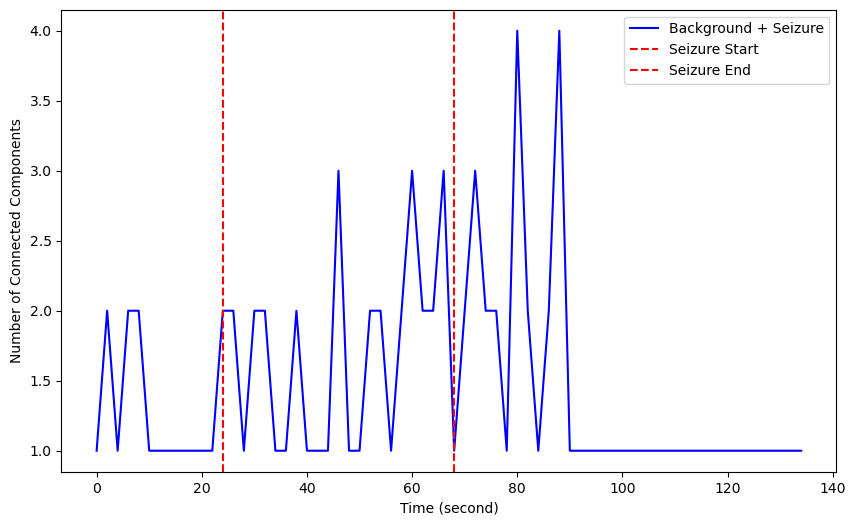

In [76]:
length = len(density_combined)
x_values = list(range(0, 2 * length + 1, 2))
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], density_combined, label='Background + Seizure', color='blue')
plt.axvline(x=24, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=68, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Density')
# plt.title('Graph Densities (Background + Seizure)')
plt.legend()
plt.show()

# Plot comparison for clustering coefficient
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], clustering_coefficient_combined, label='Background + Seizure', color='blue')
plt.axvline(x=24, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=68, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Clustering Coefficient')
# plt.title('Clustering Coefficients (Background + Seizure)')
plt.legend()
plt.show()

# Plot comparison for number of connected components
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], number_of_connected_components_combined, label='Background + Seizure', color='blue')
plt.axvline(x=24, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=68, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Number of Connected Components')
# plt.title('Number of Connected Components (Background + Seizure)')
plt.legend()
plt.show()

In [77]:
def feature_extract(graph):
    features = {}
        
    # Clustering coefficient (considering weights)
    features['clustering_coefficient'] = nx.average_clustering(graph, weight='weight')
    
    # Diameter and average shortest path length (considering weights)
    if nx.is_connected(graph):
        features['diameter'] = nx.diameter(graph, weight='weight')
        features['average_shortest_path_length'] = nx.average_shortest_path_length(graph, weight='weight')
    else:
        features['diameter'] = float('inf')  # Use infinity if the graph is not connected
        features['average_shortest_path_length'] = float('inf')
    
    return features

In [78]:
# Assuming G_seizure and G_background are your lists of seizure and background graphs
features_seizure = [feature_extract(G) for G in G_seizure]
features_background = [feature_extract(G) for G in G_background]

In [79]:
# Initialize lists to collect each feature
# clustering_coefficient_seizure_list = []
diameter_seizure_list = []
average_shortest_path_length_seizure_list = []

# Collect each feature into lists
for features in features_seizure:
    # clustering_coefficient_seizure_list.append(features['clustering_coefficient'])
    diameter_seizure_list.append(features['diameter'])
    average_shortest_path_length_seizure_list.append(features['average_shortest_path_length'])

# # Convert lists to numpy arrays for easier computation
# clustering_coefficient_seizure_array = np.array(clustering_coefficient_seizure_list)
diameter_seizure_array = np.array(diameter_seizure_list)
average_shortest_path_length_seizure_array = np.array(average_shortest_path_length_seizure_list)

# # Repeat for background graphs
# clustering_coefficient_background_list = []
diameter_background_list = []
average_shortest_path_length_background_list = []

# Collect each feature into lists
for features in features_background:
    # clustering_coefficient_background_list.append(features['clustering_coefficient'])
    diameter_background_list.append(features['diameter'])
    average_shortest_path_length_background_list.append(features['average_shortest_path_length'])

# # Convert lists to numpy arrays for easier computation
# clustering_coefficient_background_array = np.array(clustering_coefficient_background_list)
diameter_background_array = np.array(diameter_background_list)
average_shortest_path_length_background_array = np.array(average_shortest_path_length_background_list)

In [80]:
# # Calculate mean and standard deviation for each feature for seizure graphs
# mean_clustering_coefficient_seizure = np.mean(clustering_coefficient_seizure_array)
# std_clustering_coefficient_seizure = np.std(clustering_coefficient_seizure_array)
mean_diameter_seizure = np.mean(diameter_seizure_array)
std_diameter_seizure = np.std(diameter_seizure_array)
mean_average_shortest_path_length_seizure = np.mean(average_shortest_path_length_seizure_array)
std_average_shortest_path_length_seizure = np.std(average_shortest_path_length_seizure_array)

# # Calculate mean and standard deviation for each feature for background graphs
# mean_clustering_coefficient_background = np.mean(clustering_coefficient_background_array)
# std_clustering_coefficient_background = np.std(clustering_coefficient_background_array)
mean_diameter_background = np.mean(diameter_background_array)
std_diameter_background = np.std(diameter_background_array)
mean_average_shortest_path_length_background = np.mean(average_shortest_path_length_background_array)
std_average_shortest_path_length_background = np.std(average_shortest_path_length_background_array)

# # Print results
# print(f"Clustering Coefficient Seizure: Mean = {mean_clustering_coefficient_seizure}, Standard Deviation = {std_clustering_coefficient_seizure}")
print(f"Diameter Seizure: Mean = {mean_diameter_seizure}, Standard Deviation = {std_diameter_seizure}")
print(f"Average Shortest Path Length Seizure: Mean = {mean_average_shortest_path_length_seizure}, Standard Deviation = {std_average_shortest_path_length_seizure}")

# print(f"Clustering Coefficient Background: Mean = {mean_clustering_coefficient_background}, Standard Deviation = {std_clustering_coefficient_background}")
print(f"Diameter Background: Mean = {mean_diameter_background}, Standard Deviation = {std_diameter_background}")
print(f"Average Shortest Path Length Background: Mean = {mean_average_shortest_path_length_background}, Standard Deviation = {std_average_shortest_path_length_background}")


Diameter Seizure: Mean = 0.4993432737667815, Standard Deviation = 0.11248727812493842
Average Shortest Path Length Seizure: Mean = 0.25545952620137247, Standard Deviation = 0.060026782168250616
Diameter Background: Mean = 0.4353510531185262, Standard Deviation = 0.12576685231708834
Average Shortest Path Length Background: Mean = 0.24151043286278046, Standard Deviation = 0.08583331772142608


In [82]:
# Concatenate the segments
diameter_combined = np.concatenate((diameter_background_array[:12], diameter_seizure_array, diameter_background_array[13:]))
average_shortest_path_length_combined = np.concatenate((average_shortest_path_length_background_array[:12], average_shortest_path_length_seizure_array, average_shortest_path_length_background_array[13:]))

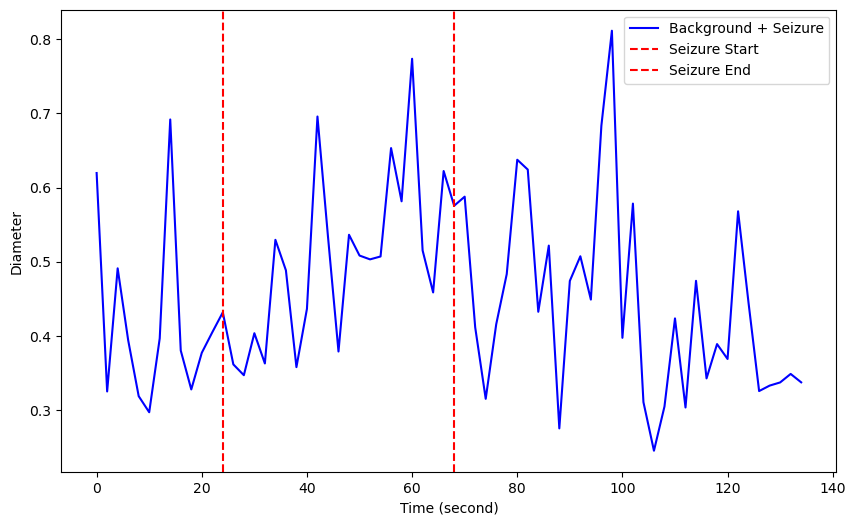

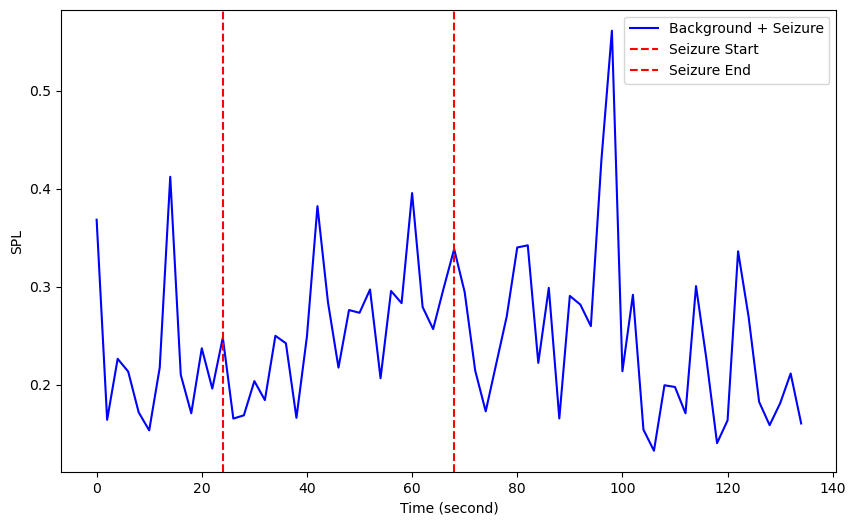

In [83]:
# Plot comparison for clustering coefficient
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], diameter_combined, label='Background + Seizure', color='blue')
plt.axvline(x=24, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=68, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Diameter')
plt.legend()
plt.show()

# Plot comparison for number of connected components
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], average_shortest_path_length_combined, label='Background + Seizure', color='blue')
plt.axvline(x=24, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=68, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('SPL')
plt.legend()
plt.show()